# BigMart Sales Analysis Project

## Import some important libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
from scipy.stats import mode
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
%matplotlib inline
sns.set()

## Make some functions

In [4]:
def Mode(x):
    return x.mode()[0]

def XY_Labels (x,y):
    X = plt.xlabel(x, fontsize = 15)
    Y = plt.ylabel(y, fontsize = 15)
    return (X,Y)

def label_encoder(b):
    le= preprocessing.LabelEncoder()
    return le.fit_transform(b) 

## Data Wrangling

### Load and discover our data

In [5]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
print(df['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Handling Missing & Null Values using Mean & Mode functions

In [12]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace= True)

In [13]:
df['Item_Visibility'].replace(0, np.nan, inplace=True)
df['Item_Visibility'].isna().sum()

526

In [14]:
df['Item_Visibility'].fillna(df['Item_Visibility'].mean(), inplace= True)
df['Item_Visibility'].isna().sum()

0

In [15]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc= lambda x:Mode(x) )
print(outlet_size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [16]:
missing_values = df['Outlet_Size'].isnull()
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,1997.831867,2181.288914
std,4.226124,0.048730,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Handle Outliers using Box Plot

In [19]:
df['Item_Type_Combined']=df['Item_Identifier'].apply(lambda x:x[0:2])
df['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

In [20]:
q1, q3 = np.percentile(df['Item_Outlet_Sales'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
print("The Inter Quartile Range is: "+ str(iqr))
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df[(df['Item_Outlet_Sales'] > upper_bound)]
print("The total number of outliers is: " + str (len(outliers['Item_Outlet_Sales'])))
print(np.sort(outliers['Item_Outlet_Sales'].unique()))
df = df[(df['Item_Outlet_Sales'] >= lower_bound)
                        & (df['Item_Outlet_Sales'] <= upper_bound)]

The Inter Quartile Range is: 2267.049
The total number of outliers is: 186
[ 6503.5344  6507.5292  6515.5188  6524.84    6528.169   6543.4824
  6574.775   6579.4356  6595.4148  6608.065   6611.394   6615.3888
  6622.7126  6624.71    6630.0364  6636.6944  6641.355   6668.6528
  6669.3186  6687.961   6692.6216  6704.606   6705.2718  6723.2484
  6729.9064  6751.212   6757.87    6759.2016  6767.1912  6768.5228
  6769.8544  6771.186   6775.1808  6795.1548  6796.4864  6817.792
  6831.108   6849.0846  6851.082   6852.4136  6855.0768  6867.0612
  6872.3876  6881.043   6893.0274  6897.688   6911.004   6930.978
  6942.9624  6964.9338  6970.926   6972.2576  6976.2524  7017.532
  7028.1848  7028.8506  7033.5112  7064.8038  7073.4592  7084.112
  7086.1094  7094.7648  7100.757   7105.4176  7116.0704  7130.718
  7136.7102  7142.7024  7148.0288  7150.692   7152.0236  7158.6816
  7168.6686  7170.666   7182.6504  7190.64    7192.6374  7201.2928
  7222.5984  7240.575   7247.233   7266.5412  7296.5022  72

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

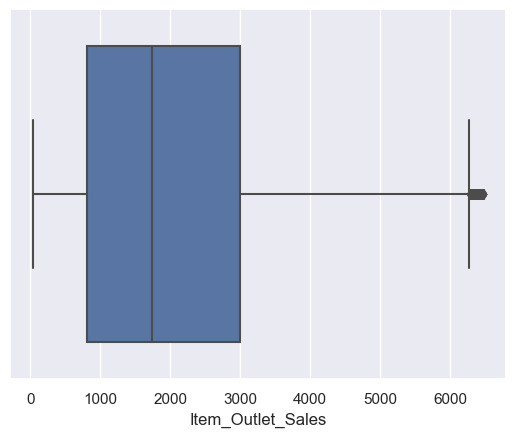

In [21]:
sns.boxplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Type_Combined', ylabel='Item_Outlet_Sales'>

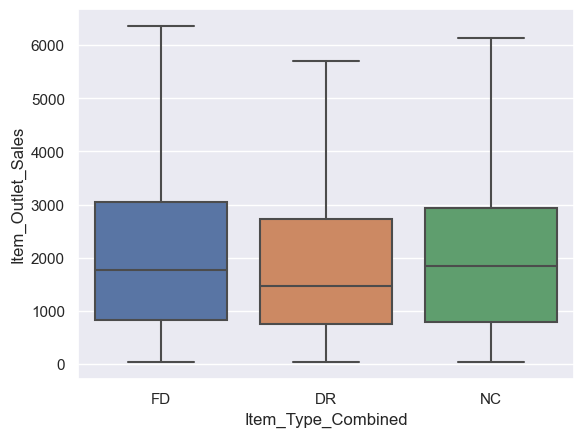

In [22]:
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=df, showfliers=False)

In [23]:
Q1, Q3 = np.percentile(df['Item_Visibility'], [25, 75])
IQR = Q3 - Q1
print("The Inter Quartile Range is: "+ str(IQR))
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound)
print(Upper_bound)
Outliers = df[(df['Item_Visibility'] > Upper_bound)]
print("The total number of Outliers is: " + str (len(Outliers['Item_Visibility'])))
print(np.sort(Outliers['Item_Visibility'].unique()))
df = df[(df['Item_Visibility'] >= Lower_bound)
                        & (df['Item_Visibility'] <= Upper_bound)]

The Inter Quartile Range is: 0.06221663400000001
-0.06024273600000002
0.1886238
The total number of Outliers is: 161
[0.18968989 0.19033746 0.19056904 0.19071125 0.19100861 0.19101366
 0.19150053 0.19160333 0.19244045 0.19254066 0.19265007 0.193478
 0.19377257 0.19487478 0.19506823 0.1956888  0.19572112 0.19643867
 0.1964909  0.19665995 0.19780911 0.19831665 0.19842484 0.19875618
 0.19899855 0.19993588 0.19995527 0.2004264  0.20168772 0.20351067
 0.2047     0.20471304 0.20498454 0.20529483 0.20548439 0.20560512
 0.20778348 0.20816216 0.20839772 0.20866255 0.20898712 0.20914265
 0.20916294 0.20960008 0.21002171 0.21037581 0.21051156 0.21059648
 0.21130667 0.21153939 0.21229375 0.21296319 0.21312548 0.21332355
 0.21412513 0.21413979 0.21430613 0.21442379 0.21468106 0.21561193
 0.21610753 0.21632301 0.21647815 0.21799414 0.22011112 0.22022561
 0.22185649 0.22206335 0.22344026 0.22398529 0.22417463 0.2246074
 0.22483731 0.22547653 0.22612296 0.22628438 0.22718958 0.22726069
 0.22846952 0.2

AxesSubplot(0.125,0.11;0.775x0.77)


C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


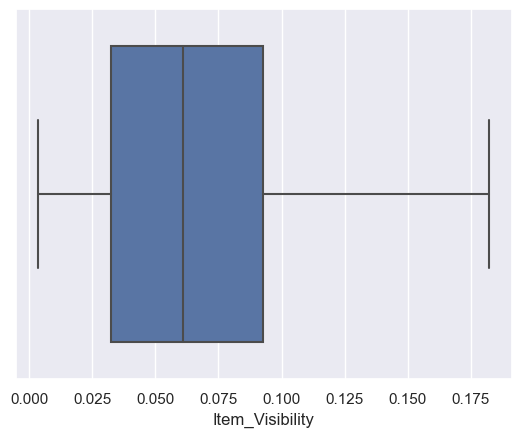

In [24]:
print(sns.boxplot(df['Item_Visibility'], showfliers=False))

C:\Users\WAGDY 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


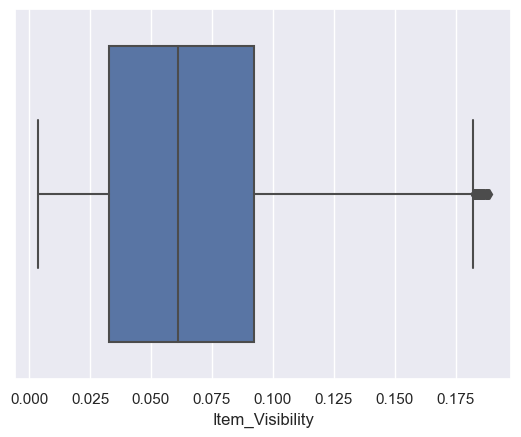

In [25]:
print(sns.boxplot(df['Item_Visibility']))

In [26]:
df.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.200,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.930,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
5,FDP36,10.395,Regular,0.070482,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD


### Using Label Encoder function

In [27]:
df['Outlet_Identifier']= label_encoder(df['Outlet_Identifier'])
df['Outlet_Location_Type']= label_encoder(df['Outlet_Location_Type'])

In [28]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
count,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000
mean,12.864241,0.067366,139.148341,4.769692,1998.101027,1.106287,2093.367953
std,4.268259,0.042986,61.546815,2.842950,8.286702,0.808414,1500.688327
min,4.555000,0.003575,31.290000,0.000000,1985.000000,0.000000,33.290000
25%,9.300000,0.032624,93.046200,2.000000,1987.000000,0.000000,862.876800
50%,12.857645,0.061009,141.149600,5.000000,1999.000000,1.000000,1789.004600
75%,16.100000,0.092477,183.663400,7.000000,2004.000000,2.000000,3022.232650
max,21.350000,0.188620,266.888400,9.000000,2009.000000,2.000000,6478.234000


## Exploratory Data Analysis (EDA)

### What is the Percentage of Fat Content in the Products ??

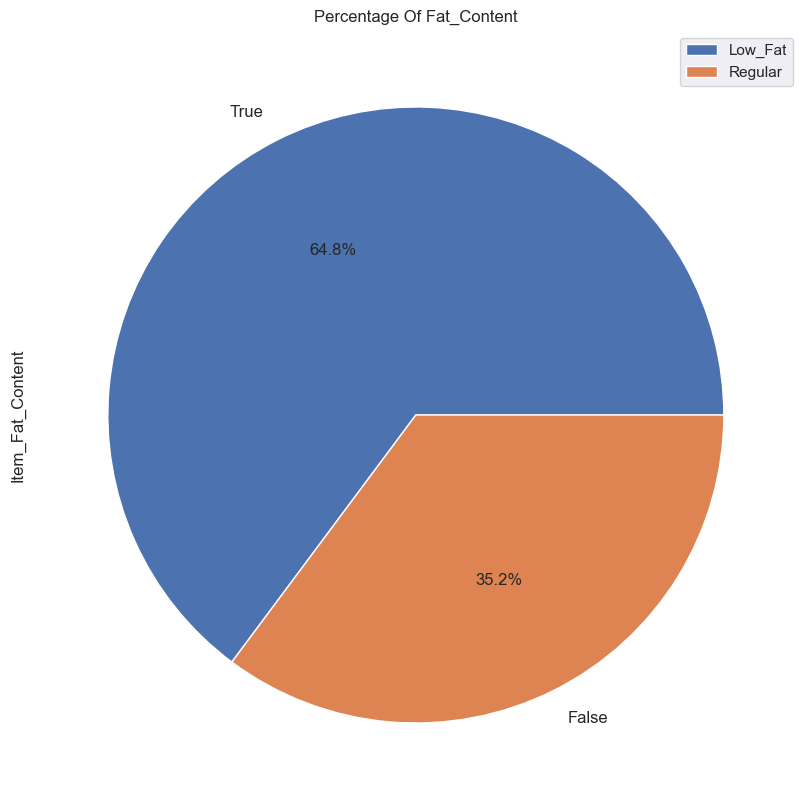

In [29]:
LF = df['Item_Fat_Content'] == "Low Fat"
R = df['Item_Fat_Content'] == "Regular"
Fat_Content = LF.value_counts()
Fat_Content.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12)  
plt.title("Percentage Of Fat_Content")
plt.legend(["Low_Fat", "Regular"])

In [30]:
LF = df['Item_Fat_Content'] == "Low Fat"
R = df['Item_Fat_Content'] == "Regular"
LF.value_counts()

True     5299
False    2877
Name: Item_Fat_Content, dtype: int64

### What are the most preferable Item Types ??

Text(0.5, 1.0, 'Top six Item types in terms of total sales')

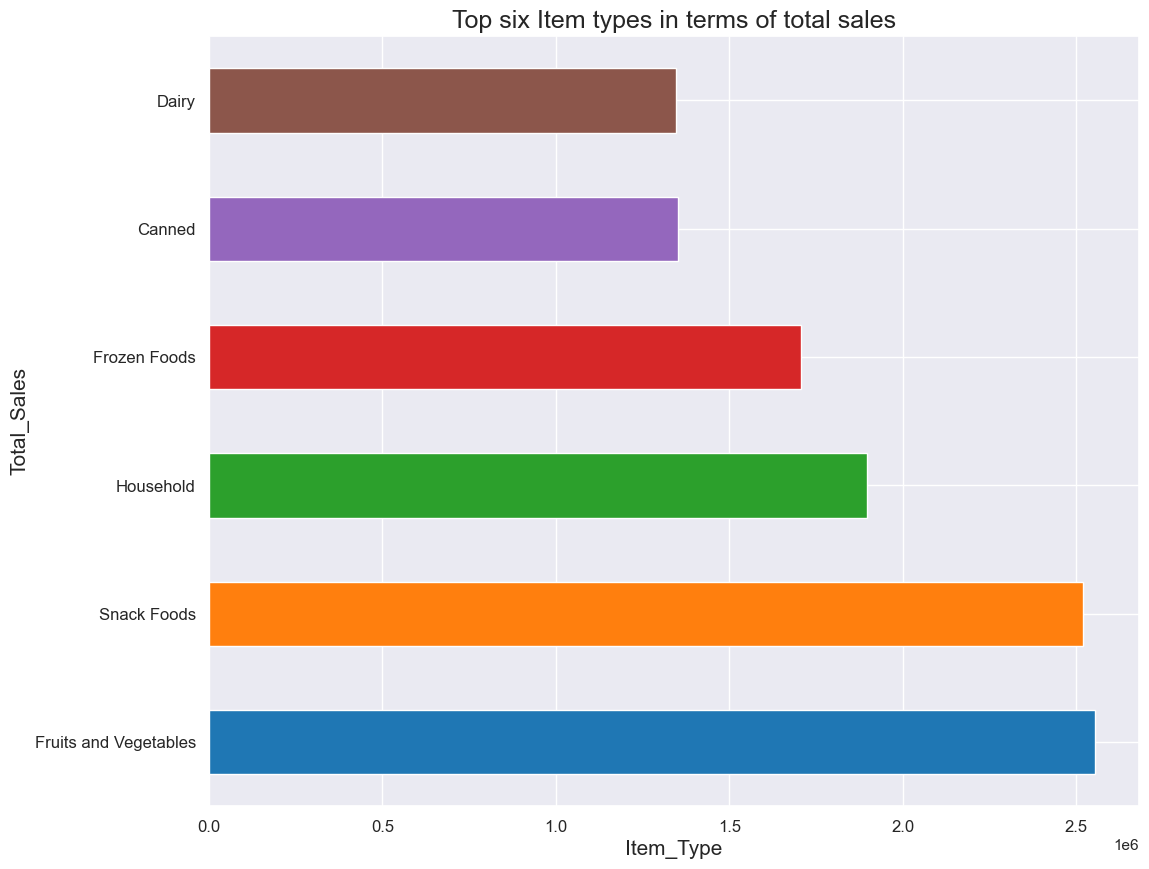

In [31]:
df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending= False)[:6].plot(kind='barh', figsize = (12,10), fontsize = 12, color = mcolors.TABLEAU_COLORS)
XY_Labels ("Item_Type","Total_Sales")
plt.title("Top six Item types in terms of total sales", fontsize = 18)

### What is the distribution of Maximum Retail Price for different items ??

(Text(0.5, 0, 'Item_MRP'), Text(0, 0.5, 'Frequency'))

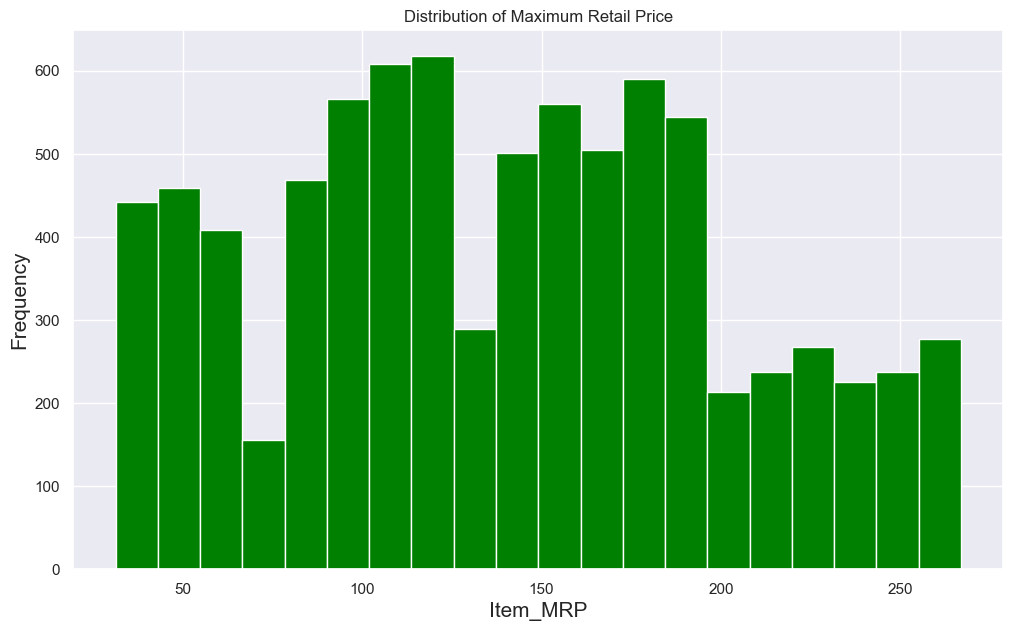

In [32]:
plt.figure(figsize = (12, 7))
plt.hist(df['Item_MRP'], bins = 20, color='green')
plt.title('Distribution of Maximum Retail Price')
XY_Labels ("Item_MRP","Frequency")

### How it looks the relation between Item MRP & Item Outlet Sales ??

(Text(0.5, 0, 'Item_MRP'), Text(0, 0.5, 'Item_Outlet_Sales'))

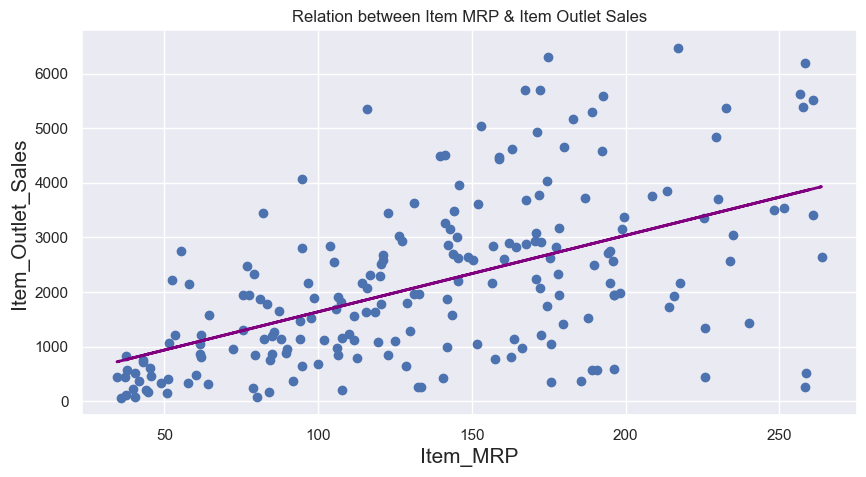

In [33]:
df1 = df.sample(frac =.025)
plt.figure(figsize = (10,5))
x = df1['Item_MRP']
y = df1['Item_Outlet_Sales']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="purple", linewidth=2, linestyle="--")
plt.title('Relation between Item MRP & Item Outlet Sales')
XY_Labels ("Item_MRP","Item_Outlet_Sales")

### What is the Maximum Retail Price for different Outlet Sizes ??

Text(0.5, 1.0, 'The Maximum Retail Price for each Outlet Size')

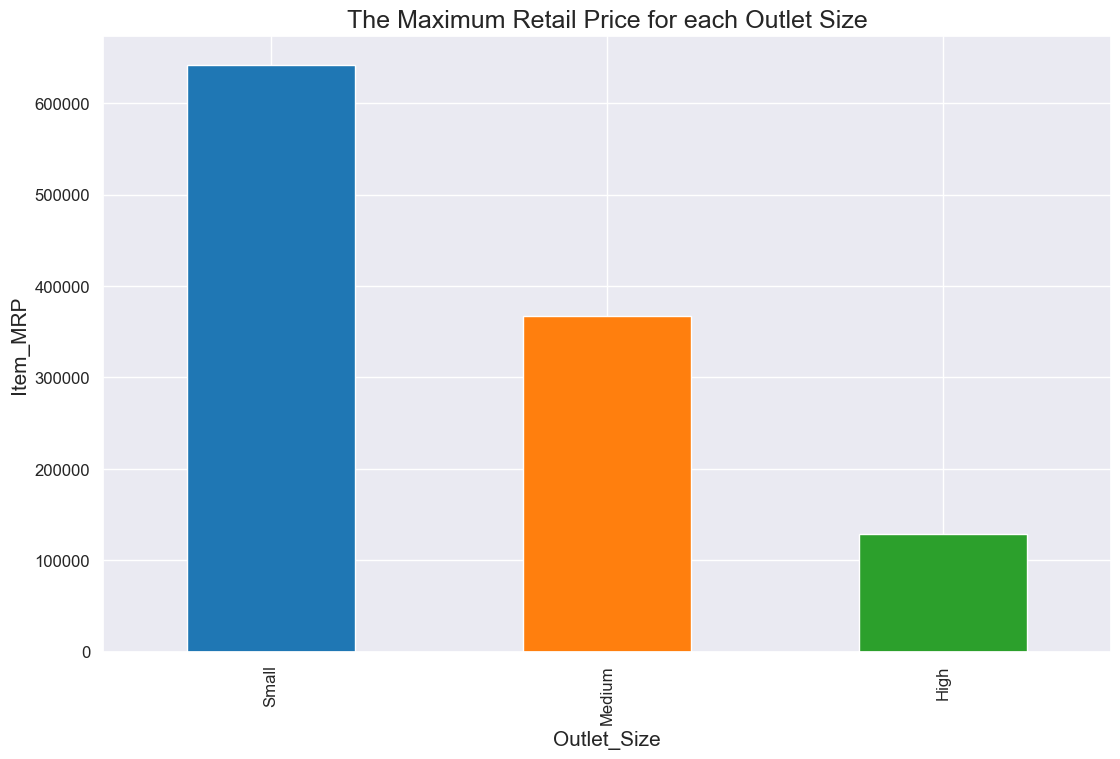

In [34]:
df.groupby('Outlet_Size')['Item_MRP'].sum().sort_values(ascending= False).plot(kind='bar', figsize = (13,8), fontsize = 12, color = mcolors.TABLEAU_COLORS)
XY_Labels ("Outlet_Size","Item_MRP")
plt.title("The Maximum Retail Price for each Outlet Size", fontsize = 18)

### What is Average Sales for different Types of Outlet ??

Text(0.5, 1.0, 'Average Sales for each Outlet Type')

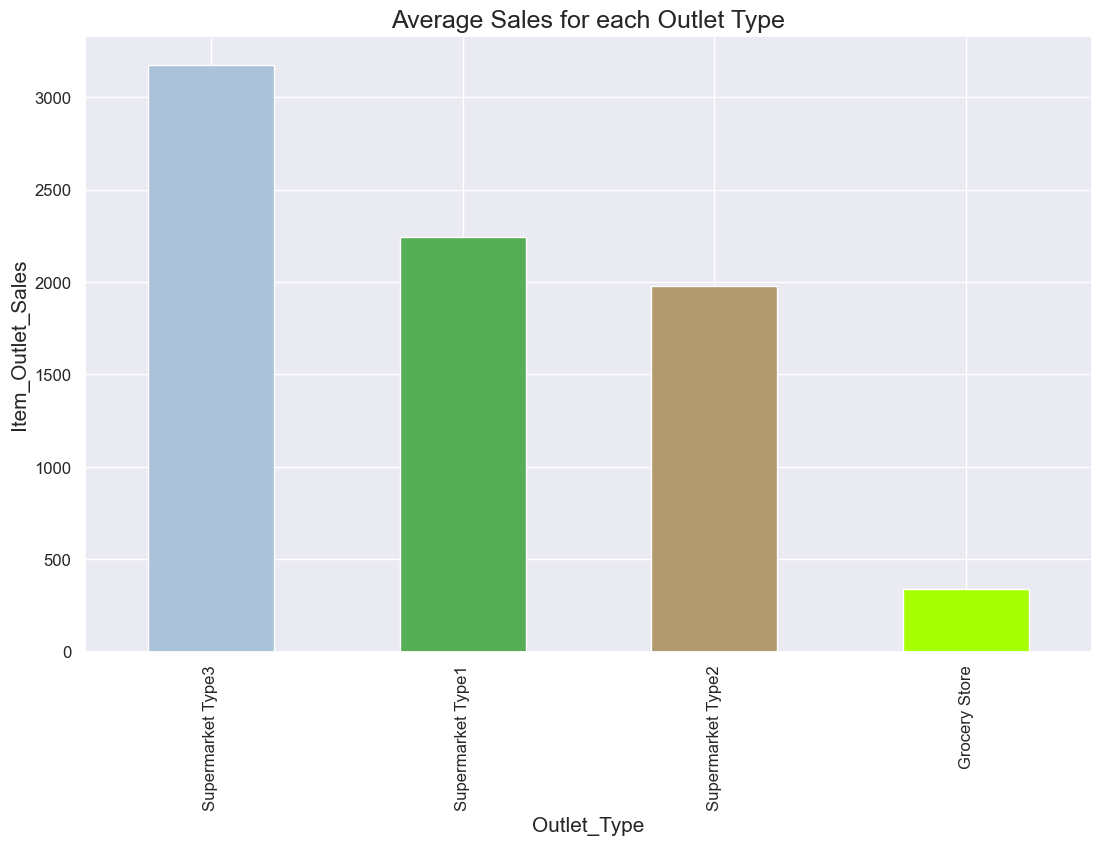

In [35]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending= False).plot(kind='bar', figsize = (13,8), fontsize = 12, color = mcolors.XKCD_COLORS)
XY_Labels ("Outlet_Type","Item_Outlet_Sales")
plt.title("Average Sales for each Outlet Type", fontsize = 18)

## Correlation

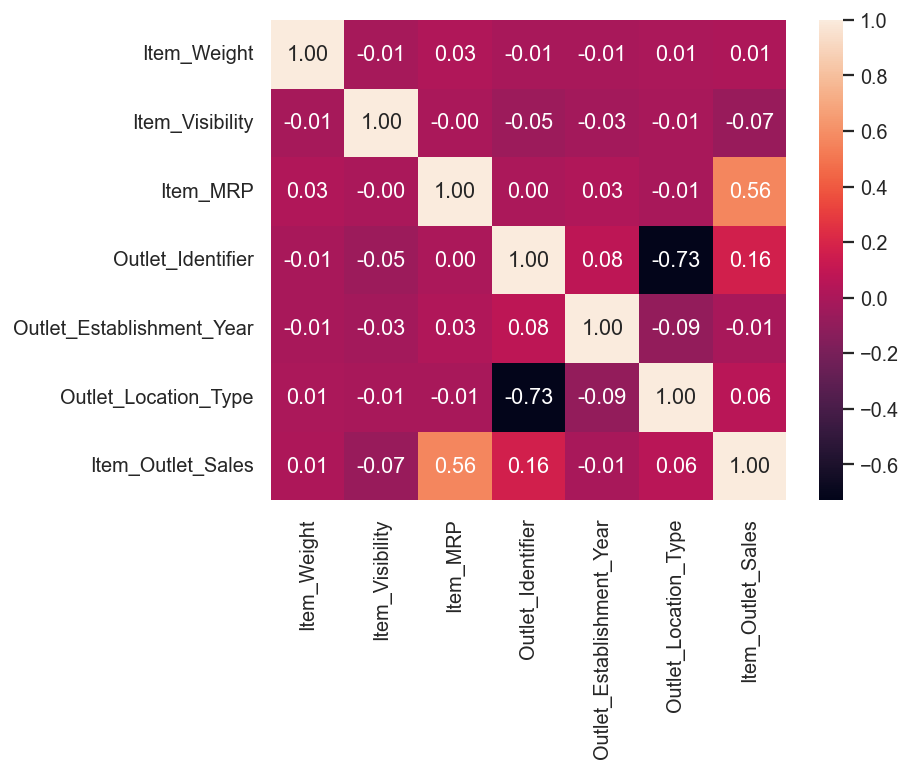

In [36]:
corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [37]:
corr['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.564743
Outlet_Identifier            0.164573
Outlet_Location_Type         0.055599
Item_Weight                  0.010844
Outlet_Establishment_Year   -0.011426
Item_Visibility             -0.071070
Name: Item_Outlet_Sales, dtype: float64

### Convert all columns to number_Columns

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8176 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8176 non-null   object 
 1   Item_Weight                8176 non-null   float64
 2   Item_Fat_Content           8176 non-null   object 
 3   Item_Visibility            8176 non-null   float64
 4   Item_Type                  8176 non-null   object 
 5   Item_MRP                   8176 non-null   float64
 6   Outlet_Identifier          8176 non-null   int32  
 7   Outlet_Establishment_Year  8176 non-null   int64  
 8   Outlet_Size                8176 non-null   object 
 9   Outlet_Location_Type       8176 non-null   int32  
 10  Outlet_Type                8176 non-null   object 
 11  Item_Outlet_Sales          8176 non-null   float64
 12  Item_Type_Combined         8176 non-null   object 
dtypes: float64(4), int32(2), int64(1), object(6)
mem

In [39]:
df1 = df
df1['Item_Identifier']= label_encoder(df1['Item_Identifier'])
df1['Item_Fat_Content']= label_encoder(df1['Item_Fat_Content'])
df1['Item_Type']= label_encoder(df1['Item_Type'])
df1['Outlet_Size']= label_encoder(df1['Outlet_Size'])
df1['Outlet_Type']= label_encoder(df1['Outlet_Type'])
df1['Item_Type_Combined']= label_encoder(df1['Item_Type_Combined'])
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8176 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8176 non-null   int32  
 1   Item_Weight                8176 non-null   float64
 2   Item_Fat_Content           8176 non-null   int32  
 3   Item_Visibility            8176 non-null   float64
 4   Item_Type                  8176 non-null   int32  
 5   Item_MRP                   8176 non-null   float64
 6   Outlet_Identifier          8176 non-null   int32  
 7   Outlet_Establishment_Year  8176 non-null   int64  
 8   Outlet_Size                8176 non-null   int32  
 9   Outlet_Location_Type       8176 non-null   int32  
 10  Outlet_Type                8176 non-null   int32  
 11  Item_Outlet_Sales          8176 non-null   float64
 12  Item_Type_Combined         8176 non-null   int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 

## Normalizaton

In [40]:
X = df1.drop(columns =['Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility'])
Y = df1.drop(columns =['Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type_Combined', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Identifier', 'Item_Fat_Content'])

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
rescaledX[:6]

array([[0.26666667, 0.        , 0.33333333, 0.57438017, 0.5       ],
       [0.93333333, 1.        , 0.66666667, 0.06363636, 0.        ],
       [0.66666667, 0.        , 0.33333333, 0.32024793, 0.5       ],
       [0.4       , 1.        , 0.        , 0.10847107, 0.5       ],
       [0.6       , 1.        , 0.33333333, 0.14917355, 1.        ],
       [0.        , 1.        , 0.66666667, 0.08119835, 0.5       ]])

## Standardization

In [41]:
scaler = StandardScaler().fit(Y)
rescaledY = scaler.transform(Y)
rescaledY[:5]

array([[-0.83510846, -1.19393498, -0.76838005,  1.79810486, -0.26513172,
         1.09407825],
       [-1.62704888, -1.11876765,  1.61018852, -1.47667592,  1.03523839,
        -1.09952615],
       [ 1.08616712, -1.17735227,  0.65876109,  0.04012896, -0.26513172,
         0.00260033],
       [ 1.48448035,  0.07248605, -0.29266634,  0.69783117, -1.56550183,
        -0.9069646 ],
       [-0.92180016,  0.07248605,  0.42090423, -1.38580945, -0.26513172,
        -0.73215066]])

## Apply Linear Regression Model On Data

In [42]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [43]:
model = LinearRegression().fit(X, Y)

r_sq = model.score(X, Y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.5681653648881582


In [44]:
print(f"intercept: {model.intercept_}")

intercept: [ 1.20393779e+01  8.10050247e-02  1.82076576e-13  9.88863197e+01
 -1.22124533e-14 -1.81898940e-12]


In [45]:
print(f"slope: {model.coef_}")

slope: [[ 2.95037742e-02  5.78630812e-02 -7.62790398e-02  3.85106148e-05
   5.10077732e-01]
 [-3.88942143e-04  1.82941226e-03 -5.31204217e-03 -1.09500920e-06
  -3.80054055e-03]
 [ 1.00000000e+00  7.15660322e-16  5.47755799e-18 -1.18903203e-16
   7.58665764e-17]
 [ 2.87134554e-01  7.49709119e+00 -2.52627520e+01  2.74510694e-02
   2.59298057e+00]
 [-2.51397804e-18  1.05504594e-14  1.00000000e+00  5.42101086e-20
   1.13835799e-16]
 [-1.27063717e-14  1.05793152e-12 -2.20612339e-12  1.00000000e+00
   1.52834017e-14]]


In [46]:
x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
print(x)
Model = LinearRegression().fit(x, Y)

[[4.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.39512559e+07
  3.73513800e+03 1.00000000e+00]
 [1.40000000e+01 2.00000000e+00 2.00000000e+00 ... 1.96623780e+05
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+01 0.00000000e+00 1.00000000e+00 ... 4.39854145e+06
  2.09727000e+03 1.00000000e+00]
 ...
 [8.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.42352006e+06
  2.38622720e+03 4.00000000e+00]
 [1.30000000e+01 2.00000000e+00 2.00000000e+00 ... 3.40623050e+06
  1.84559760e+03 1.00000000e+00]
 [1.40000000e+01 0.00000000e+00 1.00000000e+00 ... 5.86250549e+05
  0.00000000e+00 0.00000000e+00]]


In [47]:
R_sq = Model.score(x, Y)
Intercept, Coefficients = Model.intercept_, Model.coef_
y_pred = Model.predict(x)

In [48]:
print(f"coefficient of determination: {R_sq}")
print(f"intercept: {Intercept}")
print(f"coefficients:\n{Coefficients}")
print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.5784435258216429
intercept: [ 1.25091219e+01  8.90148524e-02 -6.21724894e-14  1.04483088e+02
  1.77142301e-10 -1.27329258e-11]
coefficients:
[[ 3.93741663e-02 -1.71391905e-01 -8.11839304e-02  5.79889313e-05
  -9.91440241e-03 -6.98068384e-03  2.79986421e-03 -2.26953635e-03
   3.62344930e-06  1.04644233e-01  1.90113950e-01 -1.59183363e-01
   6.98166837e-05 -1.44129392e-01  1.13040122e-01 -8.77195694e-05
   8.51279439e-02  2.60946764e-09 -1.76966057e-05 -2.07640005e-01]
 [-5.81086660e-04 -3.37413746e-03 -2.63717196e-02 -1.84463427e-06
   1.01160528e-02  1.14056272e-05 -1.52469750e-04  1.48534865e-04
   1.46521267e-07 -1.27049043e-04  1.15486732e-03  3.77191001e-03
   6.53145804e-08 -2.92798801e-04  3.85159739e-03  1.59120665e-07
   3.89671070e-04  1.16015557e-10 -5.39914838e-07 -5.24561251e-03]
 [ 1.00000000e+00  2.27743454e-15  1.03084092e-15  2.34160057e-16
  -1.52330675e-15  1.18431888e-18  8.84021781e-16 -1.35940694e-15
  -1.55538678e-18 -3.54265105e-16

In [49]:
x = sm.add_constant(x)
y = df.Item_MRP
x

array([[1.00000000e+00, 4.00000000e+00, 0.00000000e+00, ...,
        1.39512559e+07, 3.73513800e+03, 1.00000000e+00],
       [1.00000000e+00, 1.40000000e+01, 2.00000000e+00, ...,
        1.96623780e+05, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+01, 0.00000000e+00, ...,
        4.39854145e+06, 2.09727000e+03, 1.00000000e+00],
       ...,
       [1.00000000e+00, 8.00000000e+00, 1.00000000e+00, ...,
        1.42352006e+06, 2.38622720e+03, 4.00000000e+00],
       [1.00000000e+00, 1.30000000e+01, 2.00000000e+00, ...,
        3.40623050e+06, 1.84559760e+03, 1.00000000e+00],
       [1.00000000e+00, 1.40000000e+01, 0.00000000e+00, ...,
        5.86250549e+05, 0.00000000e+00, 0.00000000e+00]])

In [50]:
MOdel = sm.OLS(y, x)

In [51]:
results = MOdel.fit()

In [52]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Item_MRP   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     310.7
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:19:59   Log-Likelihood:                -42968.
No. Observations:                8176   AIC:                         8.598e+04
Df Residuals:                    8155   BIC:                         8.613e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4831      5.902     17.703      0.0

In [53]:
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

coefficient of determination: 0.43248544603803163
adjusted coefficient of determination: 0.43109362616320157
regression coefficients: const    104.483088
x1         2.193171
x2       -21.067335
x3       -79.179132
x4         0.055200
x5        13.011748
x6        -0.095966
x7        -0.246987
x8         0.368290
x9        -0.000269
x10        0.026057
x11        9.960551
x12       17.989373
x13       -0.002020
x14       -0.747810
x15        3.884794
x16        0.001071
x17       -1.143704
x18       -0.000004
x19       -0.000341
x20       -4.418384
dtype: float64
